 # House Sales in King County, USA
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

 ## 1. Data upload and first study

In [4]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import optuna
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/House_Sales/kc_house_data.csv')

In [8]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

None

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# Delete column "id"
df = df.drop(['id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [12]:
# Check duplicates
df.duplicated().sum()

0

 ## 2. Analysis of data

In [19]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']] # choice all features
num_cols = 2 # Amount of columns
num_rows = (len(df_describe.columns) + num_cols - 1) // num_cols # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

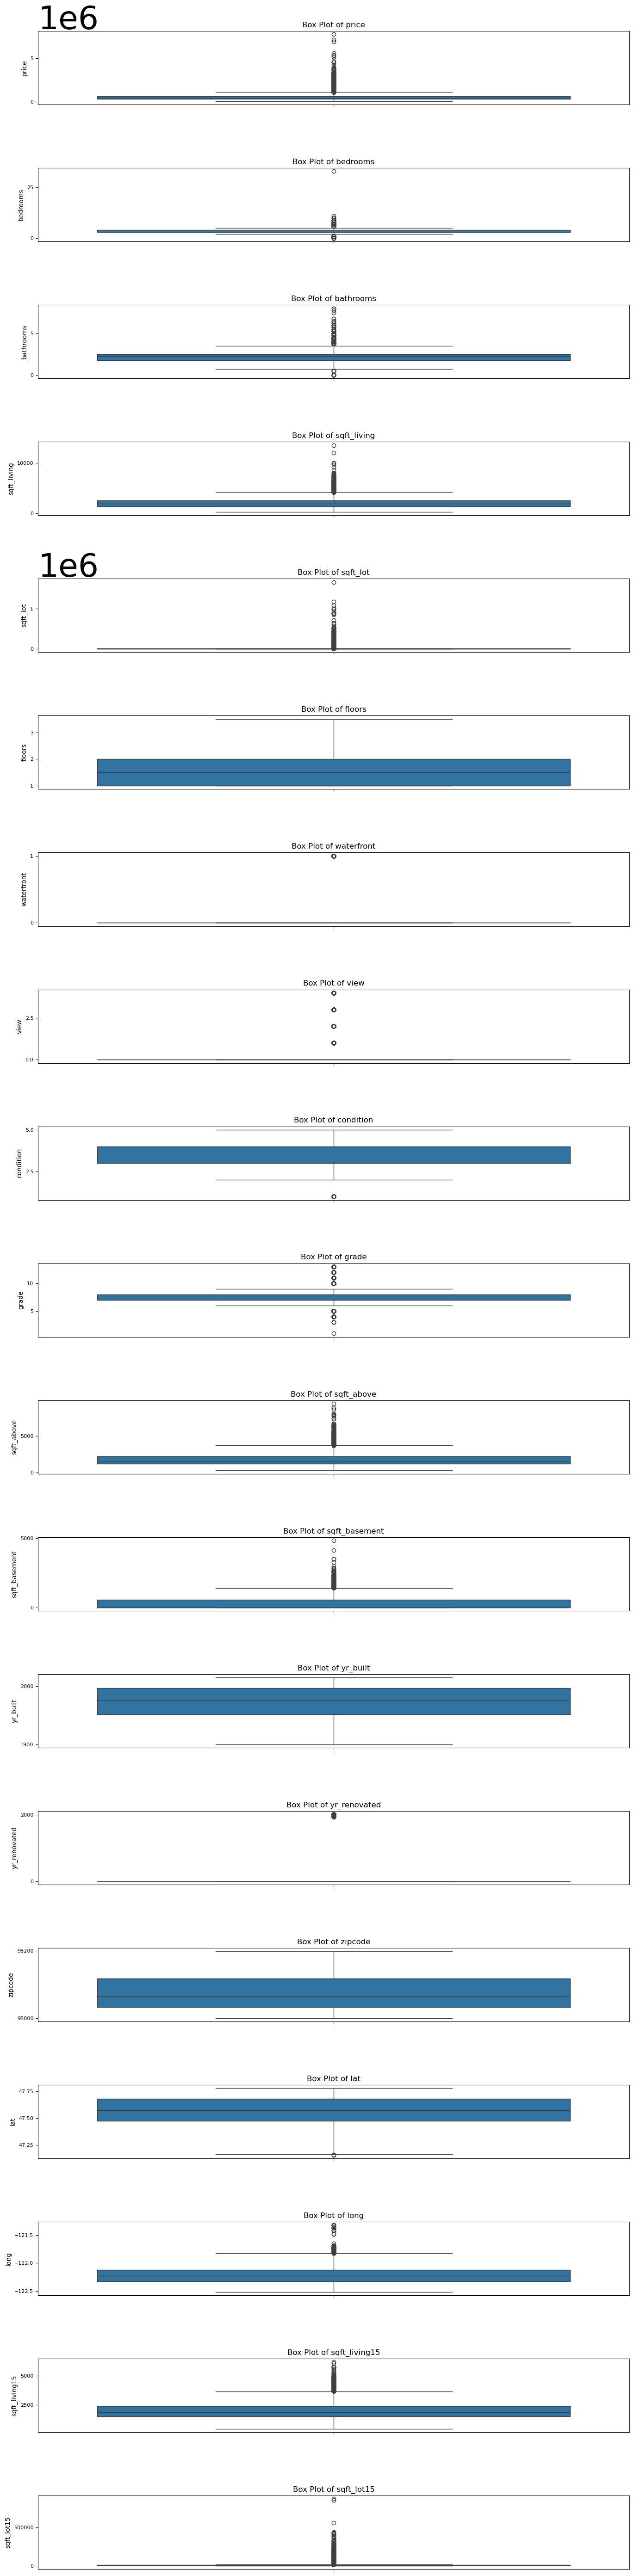

In [28]:
# Создание боксплотов для каждой числовой характеристики
numerical_features = df.select_dtypes(include=['number'])

# Определяем размер фигуры один раз
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Создаем подграфики для каждого числового признака
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Создаем подграфик
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Размер шрифта заголовка
    plt.ylabel(feature, fontsize=10)  # Размер шрифта метки оси Y
    plt.xlabel('')  # Убираем метку оси X, если она не нужна
    
    # Увеличиваем размер шрифта меток на осях
    plt.xticks(fontsize=8)  # Размер шрифта меток на оси X
    plt.yticks(fontsize=8)  # Размер шрифта меток на оси Y

plt.tight_layout()  # Автоматически подгоняет подграфики
plt.show()

 #### Build a matrix of dependences for target

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_4564/3291478919.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


interval columns not set, guessing: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


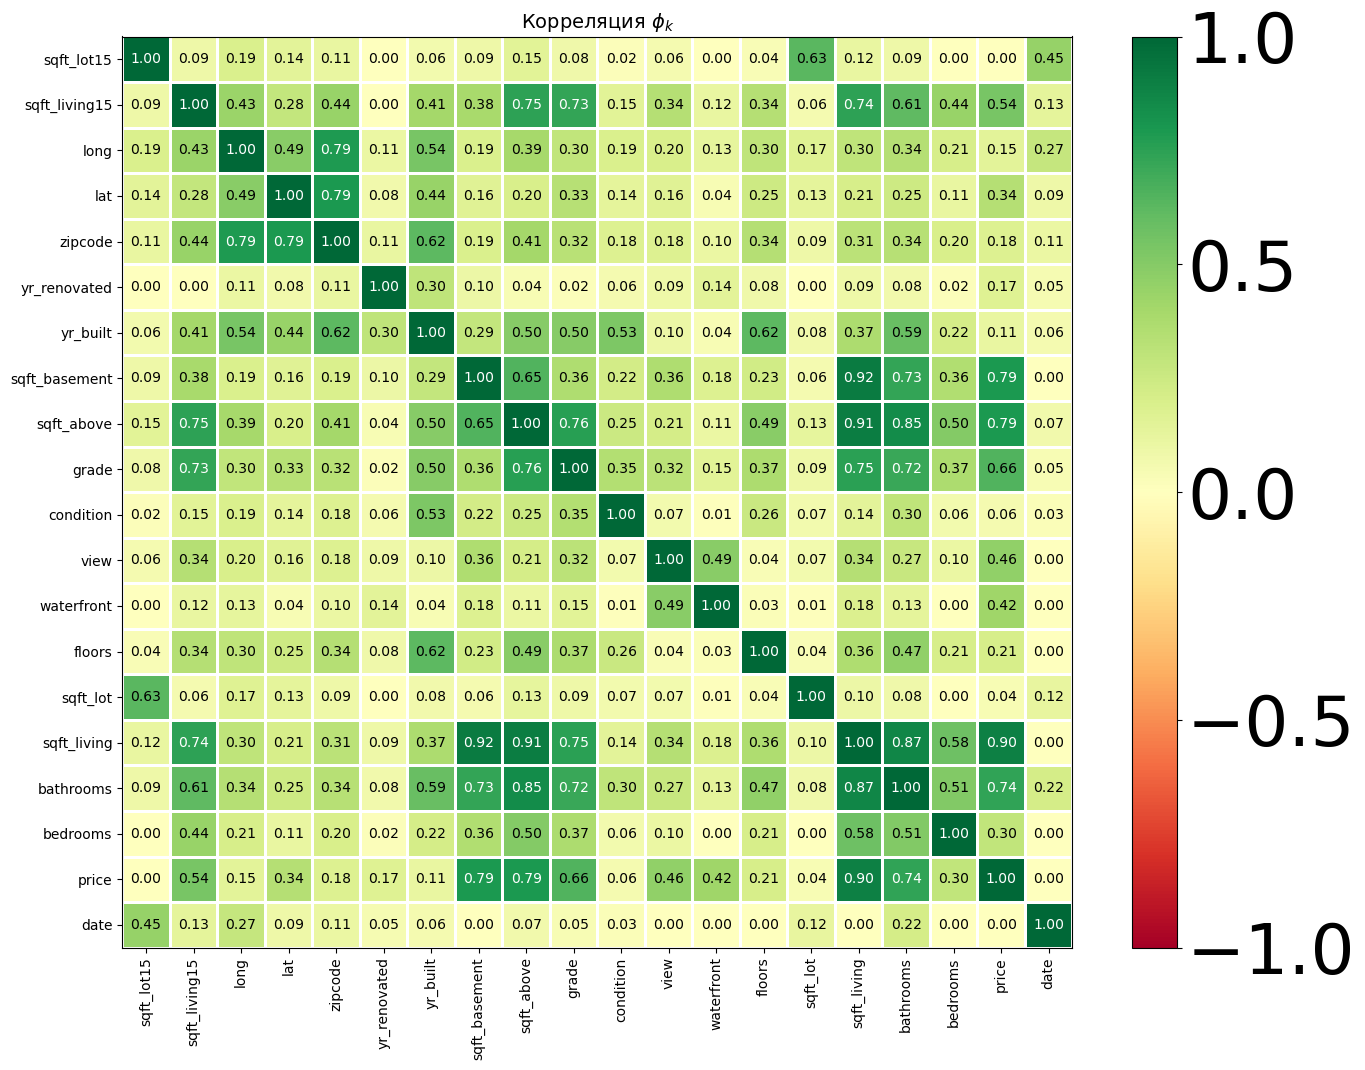

In [36]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(15, 12)
)


 ## Data preparation

In [47]:
# Select a features and target
features = df.drop(['price', 'date'], axis=1)
target = df['price']

# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data price
350000.0     140
450000.0     139
500000.0     129
550000.0     129
425000.0     122
            ... 
1437500.0      1
696950.0       1
182700.0       1
774888.0       1
995500.0       1
Name: count, Length: 3526, dtype: int64

Test data price
450000.0    33
475000.0    32
350000.0    32
325000.0    31
550000.0    30
            ..
926250.0     1
799200.0     1
366400.0     1
574500.0     1
457500.0     1
Name: count, Length: 1565, dtype: int64


 #### Write the function for metrics

In [50]:
def metrics(predictions, target):
    mae = mean_absolute_error(target, predictions)
    mse = mean_squared_error(target, predictions)
    rmse = np.sqrt(mse)
    r_squared = r2_score(target, predictions)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R_2': r_squared}

 ### Train Linear Regression model

In [53]:
fit_intercepts = [True, False]
best_result = 0
linear_regres, best_fit_intercept = None, None

for fit_intercept in fit_intercepts:
    model = LinearRegression(fit_intercept=fit_intercept)
    
    scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
    result = np.mean(scores)  

    if result > best_result:
        linear_regres = model
        best_result = result
        best_fit_intercept = fit_intercept



# Train model
linear_regres.fit(features_train, target_train)

# Received predictions
predictions = linear_regres.predict(features_test)

lin_reg = metrics(predictions, target_test)


print(f'The best parameters: fit_intercept={best_fit_intercept}')
print(f'Metrics: {lin_reg}')

The best parameters: fit_intercept=True
Metrics: {'MAE': 125021.26210560513, 'MSE': 34936484673.00817, 'RMSE': 186913.04040384173, 'R_2': 0.70035332700992}


 #### Train DecisionTree Model

In [56]:
min_samples_splits = [2, 5, 10]
best_result = 0
best_params = None
decision_tree_regressor = None

for max_depth in range(1, 16):
    for min_samples_split in min_samples_splits:
        model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
        result = np.mean(scores)  

        if result > best_result:
            decision_tree_regressor = model
            best_result = result
            best_params = (max_depth, min_samples_split)

# Train model
decision_tree_regressor.fit(features_train, target_train)

# Receive predictions
predictions = decision_tree_regressor.predict(features_test)


dec_reg = metrics(predictions, target_test)

print(f'The best parameters: max_depth={best_params[0]}, min_samples_split={best_params[1]}')
print(f'Metrics: {dec_reg}')

The best parameters: max_depth=9, min_samples_split=5
Metrics: {'MAE': 92039.02113988067, 'MSE': 26740281069.419147, 'RMSE': 163524.55800099001, 'R_2': 0.7706513310578839}


 #### Train Randomforest Model

In [59]:
n_estimators_options = [50, 100, 200]
max_depths = range(1, 16)
best_result = 0
best_params = None
random_forest_regressor = None

for n_estimators in n_estimators_options:
    for max_depth in max_depths:
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
        result = np.mean(scores) 

        if result > best_result:
            random_forest_regressor = model
            best_result = result
            best_params = (n_estimators, max_depth)

# Train model
random_forest_regressor.fit(features_train, target_train)

# Receive predictions
predictions = random_forest_regressor.predict(features_test)

rf_metrics = metrics(predictions, target_test)

print(f'The best parameters: n_estimators={best_params[0]}, max_depth={best_params[1]}')
print(f'Metrics: {rf_metrics}')

The best parameters: n_estimators=200, max_depth=14
Metrics: {'MAE': 67578.02546283284, 'MSE': 13707309876.596863, 'RMSE': 117078.22118821614, 'R_2': 0.8824337984027443}


 #### Train KNeighborsRegressor model

In [66]:
n_neighbors_options = [3, 5, 7, 10, 15]
weights_options = ['uniform', 'distance']
best_result = 0
best_params = None
knn_regressor = None

for n_neighbors in n_neighbors_options:
    for weights in weights_options:
        model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
        
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
        result = np.mean(scores)  

        if result > best_result:
            knn_regressor = model
            best_result = result
            best_params = (n_neighbors, weights)

# Train model
knn_regressor.fit(features_train, target_train)

# Receive predictions
predictions = knn_regressor.predict(features_test)

knn_metrics = metrics(predictions, target_test)

print(f'The best parameters: n_neighbors={best_params[0]}, weights={best_params[1]}')
print(f'Metrics: {knn_metrics}')

The best parameters: n_neighbors=7, weights=distance
Metrics: {'MAE': 84991.00794784815, 'MSE': 22213822949.410175, 'RMSE': 149043.02382000364, 'R_2': 0.8094743016224502}


 #### Train LGBMRegressor model

In [68]:
lgbm_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, -1]  # -1 означает отсутствие ограничения
}

best_result_lgbm = 0
best_params_lgbm = None
lgbm_regressor = None

for n_estimators in lgbm_params['n_estimators']:
    for learning_rate in lgbm_params['learning_rate']:
        for max_depth in lgbm_params['max_depth']:
            model = LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
            
            scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
            result = np.mean(scores)

            if result > best_result_lgbm:
                lgbm_regressor = model
                best_result_lgbm = result
                best_params_lgbm = (n_estimators, learning_rate, max_depth)

# Обучение модели
lgbm_regressor.fit(features_train, target_train)

# Получение предсказаний
predictions_lgbm = lgbm_regressor.predict(features_test)

# Вычисление метрик
lgbm_metrics = metrics(predictions_lgbm, target_test)

print(f'LGBM - The best parameters: n_estimators={best_params_lgbm[0]}, learning_rate={best_params_lgbm[1]}, max_depth={best_params_lgbm[2]}')
print(f'LGBM - Metrics: {lgbm_metrics}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2327
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 18
[LightGBM] [Info] Start training from score 539976.806319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

 #### Train CatBoostRegressor model

In [70]:
catboost_params = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7]
}

best_result_catboost = 0
best_params_catboost = None
catboost_regressor = None

for iterations in catboost_params['iterations']:
    for learning_rate in catboost_params['learning_rate']:
        for depth in catboost_params['depth']:
            model = CatBoostRegressor(iterations=iterations, learning_rate=learning_rate, depth=depth, verbose=0)
            
            scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
            result = np.mean(scores)

            if result > best_result_catboost:
                catboost_regressor = model
                best_result_catboost = result
                best_params_catboost = (iterations, learning_rate, depth)

# Обучение модели
catboost_regressor.fit(features_train, target_train)

# Получение предсказаний
predictions_catboost = catboost_regressor.predict(features_test)

# Вычисление метрик
catboost_metrics = metrics(predictions_catboost, target_test)

print(f'CatBoost - The best parameters: iterations={best_params_catboost[0]}, learning_rate={best_params_catboost[1]}, depth={best_params_catboost[2]}')
print(f'CatBoost - Metrics: {catboost_metrics}')

CatBoost - The best parameters: iterations=150, learning_rate=0.2, depth=7
CatBoost - Metrics: {'MAE': 65319.6692770834, 'MSE': 12066065330.775661, 'RMSE': 109845.64320343189, 'R_2': 0.8965105858162872}


 #### Train MLPRegressor model

In [72]:
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 300]
}

best_result_mlp = 0
best_params_mlp = None
mlp_regressor = None

for hidden_layer_sizes in mlp_params['hidden_layer_sizes']:
    for activation in mlp_params['activation']:
        for learning_rate_init in mlp_params['learning_rate_init']:
            for max_iter in mlp_params['max_iter']:
                model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                                     activation=activation,
                                     learning_rate_init=learning_rate_init,
                                     max_iter=max_iter,
                                     random_state=42,
                                     verbose=0)
                
                scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
                result = np.mean(scores)

                if result > best_result_mlp:
                    mlp_regressor = model
                    best_result_mlp = result
                    best_params_mlp = (hidden_layer_sizes, activation, learning_rate_init, max_iter)

# Обучение модели
mlp_regressor.fit(features_train, target_train)

# Получение предсказаний
predictions_mlp = mlp_regressor.predict(features_test)

# Вычисление метрик
mlp_metrics = metrics(predictions_mlp, target_test)

print(f'MLP - The best parameters: hidden_layer_sizes={best_params_mlp[0]}, activation={best_params_mlp[1]}, learning_rate_init={best_params_mlp[2]}, max_iter={best_params_mlp[3]}')
print(f'MLP - Metrics: {mlp_metrics}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

MLP - The best parameters: hidden_layer_sizes=(50, 50), activation=relu, learning_rate_init=0.1, max_iter=200
MLP - Metrics: {'MAE': 72069.73435560905, 'MSE': 15137455964.790514, 'RMSE': 123034.36903886049, 'R_2': 0.8701675809733733}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


 #### Train BaggingRegressor model

In [74]:
bagging_params = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

best_result_bagging = 0
best_params_bagging = None
bagging_regressor = None

for n_estimators in bagging_params['n_estimators']:
    for max_samples in bagging_params['max_samples']:
        for max_features in bagging_params['max_features']:
            model = BaggingRegressor(n_estimators=n_estimators, 
                                      max_samples=max_samples, 
                                      max_features=max_features,
                                      random_state=42)  # Установите random_state для воспроизводимости
            
            scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
            result = np.mean(scores)

            if result > best_result_bagging:
                bagging_regressor = model
                best_result_bagging = result
                best_params_bagging = (n_estimators, max_samples, max_features)


bagging_regressor.fit(features_train, target_train)


predictions_bagging = bagging_regressor.predict(features_test)


bagging_metrics = metrics(predictions_bagging, target_test)

print(f'Bagging - The best parameters: n_estimators={best_params_bagging[0]}, max_samples={best_params_bagging[1]}, max_features={best_params_bagging[2]}')
print(f'Bagging - Metrics: {bagging_metrics}')

Bagging - The best parameters: n_estimators=100, max_samples=1.0, max_features=1.0
Bagging - Metrics: {'MAE': 66802.96503879764, 'MSE': 13470748331.061728, 'RMSE': 116063.55298310373, 'R_2': 0.8844627627001098}


 ## Conclusion

In [76]:
# Build a table for total

model_metrics = [lin_reg, dec_reg, rf_metrics, knn_metrics, lgbm_metrics, catboost_metrics, mlp_metrics, bagging_metrics]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNeighborsClassifier', 'LGBM', 'CatBoost', 'MLPClassifier', 'BaggingRegressor'])
print(total.sort_values(by='R_2', ascending=False))

                                MAE           MSE           RMSE       R_2
CatBoost               65319.669277  1.206607e+10  109845.643203  0.896511
LGBM                   67583.948073  1.319476e+10  114868.441077  0.886830
BaggingRegressor       66802.965039  1.347075e+10  116063.552983  0.884463
RandomForest           67578.025463  1.370731e+10  117078.221188  0.882434
MLPClassifier          72069.734356  1.513746e+10  123034.369039  0.870168
KNeighborsClassifier   84991.007948  2.221382e+10  149043.023820  0.809474
DecisionTree           92039.021140  2.674028e+10  163524.558001  0.770651
LogisticRegression    125021.262106  3.493648e+10  186913.040404  0.700353
